Импорт библиотек, для визиулизации и редактирования

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Загрузка данных

In [36]:
data = pd.read_csv(r'data\train.csv')

Изучим данные

In [37]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
data.shape

(1460, 81)

In [39]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Посмотрим heatmap данных на пустые значения

<Axes: >

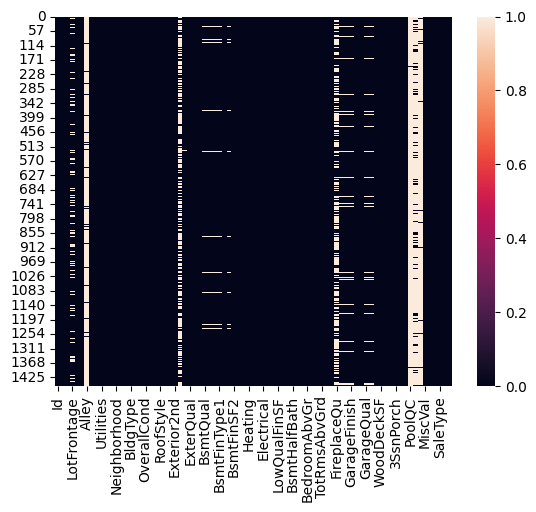

In [40]:
sns.heatmap(data = data.isnull())

Много пустых значений, отсортируем данные

In [41]:
empty_data = data.isnull().sum()[data.isnull().sum() > 0]
print(empty_data)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Удалим столбцы в которых больше 10 % данных null

In [42]:
empty_data_per = empty_data / data.shape[0]
column_for_delete = empty_data_per[empty_data_per > 0.1].index.tolist()
data.drop(column_for_delete, axis=1, inplace=True)

In [43]:
data.shape

(1460, 74)

In [44]:
row_with_more_empty_values = data.isnull().sum(axis = 1)[data.isnull().sum(axis = 1) > 3].index.tolist()
data.drop(row_with_more_empty_values, axis = 0, inplace=True)
data.shape

(1349, 74)

посмотрим heatmap

<Axes: >

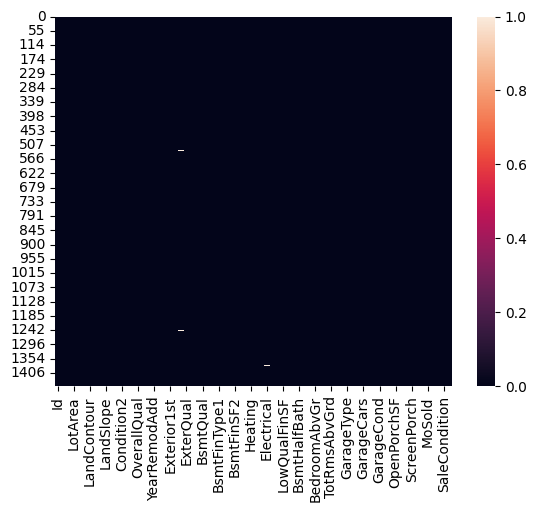

In [45]:
sns.heatmap(data = data.isnull())

Так намного лучше, как будто очень мало строк с пропущенными значениями осталось, если это так, то удалим и их

In [46]:
str_with_empty_val = data.isnull().sum(axis = 1)[data.isnull().sum(axis = 1) > 0].index.tolist()
print(str_with_empty_val)

[234, 332, 529, 650, 936, 948, 973, 977, 1243, 1278, 1379]


Верно было подмечено, удалим и их

<Axes: >

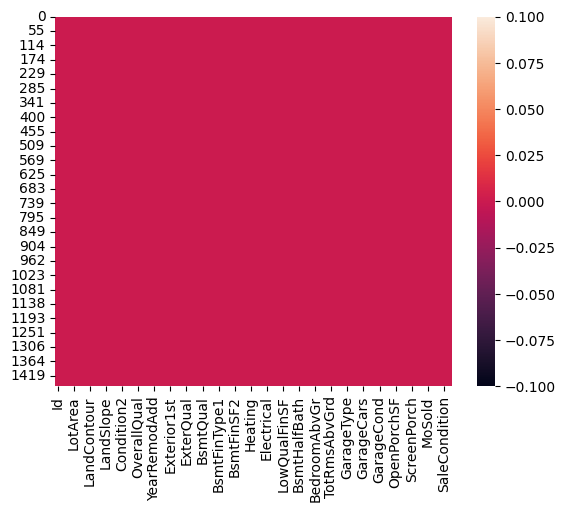

In [47]:
data.drop(str_with_empty_val, axis = 0, inplace=True)
sns.heatmap(data = data.isnull())

Отлично, думаю теперь стоит отсеять лишние признаки, используем l1 регуляризацию

Подготовим данные

In [48]:
column_no_num = data.select_dtypes(exclude=['number']).columns.tolist()
print(column_no_num)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


Довольно много данных не относщихся к числовым, применим LabelEncoder

In [49]:
from sklearn.preprocessing import OrdinalEncoder

data[column_no_num] = OrdinalEncoder().fit_transform(data[column_no_num])
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,...,272,0,0,0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,12,2008,8.0,4.0,250000


In [50]:
Y = data["SalePrice"]
X = data.drop("SalePrice", axis = 1)
print(X)

        Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0        1          60       3.0     8450     1.0       3.0          3.0   
1        2          20       3.0     9600     1.0       3.0          3.0   
2        3          60       3.0    11250     1.0       0.0          3.0   
3        4          70       3.0     9550     1.0       0.0          3.0   
4        5          60       3.0    14260     1.0       0.0          3.0   
...    ...         ...       ...      ...     ...       ...          ...   
1455  1456          60       3.0     7917     1.0       3.0          3.0   
1456  1457          20       3.0    13175     1.0       3.0          3.0   
1457  1458          70       3.0     9042     1.0       3.0          3.0   
1458  1459          20       3.0     9717     1.0       3.0          3.0   
1459  1460          20       3.0     9937     1.0       3.0          3.0   

      Utilities  LotConfig  LandSlope  ...  OpenPorchSF  EnclosedPorch  \
0           0

In [51]:
from sklearn.model_selection import train_test_split

X_train, x_tv, Y_train, y_tv  = train_test_split(X, Y, test_size=0.4, random_state=42)
X_test, X_validation, Y_test, Y_validation = train_test_split(X, Y, test_size=0.5, random_state=42)

Данные готовы, теперь используем lasso для отбора признаков и randomForest.

In [52]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import os
import joblib

def model_RF_SF(save_model = 0):  
    model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
    model_RF.fit(X_validation, Y_validation)
    if save_model: 
        joblib.dump(model_RF, "model\model_RF_select_feature.pkl")

    return model_RF

def model_lasso_SF(save_model = 0):
    model_lasso = Lasso(alpha=0.1)
    model_lasso.fit(X_validation, Y_validation)
    if save_model:
        joblib.dump(model_lasso, "model\model_lasso_select_feature.pkl")

    return model_lasso


if not os.path.exists("model\model_RF_select_feature.pkl"):
    model_RF = model_RF_SF(save_model = 1)
else:
    model_RF = joblib.load("model\model_RF_select_feature.pkl")

if not os.path.exists("model\model_lasso_select_feature.pkl"):
    model_lasso = model_lasso_SF()
else:
    model_lasso = joblib.load("model\model_lasso_select_feature.pkl")


In [53]:
mean_lasso_coef = abs(model_lasso.coef_).mean()
mean_RF_coef = model_RF.feature_importances_.mean()

print(f"mean_lasso_coef: {mean_lasso_coef}")
print(f"mean_RF_coef: {mean_RF_coef}")

mean_lasso_coef: 4176.4698623121685
mean_RF_coef: 0.0136986301369863


In [54]:

def selected_feature(threshold_l, threshold_rf):
    global lasso_selected_features, rf_selected_features
    lasso_selected_features = [X.columns[i] for i in range(len(model_lasso.coef_)) if abs(model_lasso.coef_[i]) > threshold_l]

    rf_selected_features = [X.columns[i] for i in range(len(model_RF.feature_importances_)) if model_RF.feature_importances_[i] > threshold_rf]

    common_selected_features = list(set(lasso_selected_features) & set(rf_selected_features))
    
    print(common_selected_features)

    return common_selected_features

common_selected_features = selected_feature(mean_lasso_coef / 5, mean_RF_coef / 5) 

['MSZoning', 'Fireplaces', 'BsmtFullBath', 'OverallCond', 'FullBath', 'GarageCars', 'TotRmsAbvGrd', 'KitchenQual', 'OverallQual']


In [55]:
def print_coef(title, massive):
    print(title)
    i = 0
    while i < len(massive):
        print(massive[i: i + 5])
        i += 5
    print()

In [56]:
print_coef("lasso_selected_features: ", lasso_selected_features)
print_coef("rf_selected_features: ", rf_selected_features)

lasso_selected_features: 
['MSZoning', 'Street', 'LandContour', 'Utilities', 'LandSlope']
['Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond']
['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual']
['Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1']
['BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'BsmtFullBath']
['FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd']
['Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'YrSold']
['SaleCondition']

rf_selected_features: 
['Id', 'MSZoning', 'LotArea', 'Neighborhood', 'OverallQual']
['OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1']
['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']
['GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd']
['Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea']
['WoodDeckSF', 'OpenPorchSF', 'MoSold']



In [57]:
lasso_coef = [round(float(abs(coef)), 2) for coef in model_lasso.coef_]
RF_coef = [round(float(abs(coef * 100)), 2) for coef in model_RF.feature_importances_]

print_coef("Lasso coef:", lasso_coef)
print_coef("RF feature importances:" ,RF_coef)

Lasso coef:
[0.29, 130.95, 998.56, 0.52, 47537.85]
[619.92, 3688.33, 67106.79, 174.39, 8945.87]
[749.6, 450.33, 17993.57, 1044.32, 1484.37]
[15357.05, 2162.96, 250.61, 80.92, 1170.41]
[5093.59, 1948.63, 1295.11, 23.55, 7796.02]
[788.32, 4119.85, 4558.07, 1885.43, 2181.45]
[1193.09, 4.74, 1933.83, 10.53, 9.99]
[7.16, 7728.2, 1597.51, 10179.0, 270.35]
[31.81, 27.24, 39.96, 2.62, 11619.77]
[48.32, 7546.41, 425.23, 4100.74, 17847.57]
[7454.91, 7099.27, 3594.71, 4336.64, 1327.4]
[240.66, 491.14, 8673.51, 26.24, 630.07]
[83.83, 821.83, 21.26, 19.37, 28.42]
[68.15, 99.87, 322.57, 1.6, 310.65]
[1207.27, 561.17, 3200.07]

RF feature importances:
[0.63, 0.22, 0.33, 2.13, 0.0]
[0.16, 0.16, 0.0, 0.07, 0.07]
[0.79, 0.05, 0.01, 0.03, 0.07]
[57.11, 0.78, 1.31, 0.75, 0.14]
[0.01, 0.24, 0.19, 1.06, 0.19]
[0.08, 0.04, 0.26, 0.04, 0.13]
[0.21, 2.57, 0.03, 0.39, 0.92]
[1.82, 0.04, 0.12, 0.12, 0.03]
[1.65, 1.68, 0.0, 10.02, 0.45]
[0.03, 3.42, 0.16, 0.18, 0.09]
[0.31, 1.51, 0.07, 0.3, 0.24]
[0.5, 0.31, 2.03

In [61]:
import numpy as np

def model_RF_general(select_col, save_model = 0):
    param_grid_RF = {
        "n_estimators": [30, 80, 200, 400],
        "max_depth": [None, 2, 5],
        "min_samples_split": [2, 5, 10]
    }

    model_RF = RandomForestRegressor()
    GS_RF = GridSearchCV(model_RF, param_grid=param_grid_RF, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)
    
    GS_RF.fit(X_train[select_col], Y_train)

    model_RF = GS_RF.best_estimator_
    if save_model: 
        joblib.dump(model_RF, "model\model_RF.pkl")
    
    
    return model_RF

if not os.path.exists("model\model_RF.pkl"):
    model_RF = model_RF_general(common_selected_features, save_model = 1)
else:
    model_RF = joblib.load("model\model_RF.pkl")


In [62]:
def via_predict_actual(model, select_col):
    global predicted
    predicted = model.predict(X_test[select_col])

    predict_10 = np.round(predicted[:10]).astype(int).tolist()
    true_10 = Y_test.iloc[:10].values.tolist()

    print("🔹 Predicted:", *predict_10)
    print("🔸 Actual:   ", *true_10)

    per_val = [round(min(x, y) / max(x,y), 2) for x, y in zip(predict_10, true_10)]

    print("Per val: ", *per_val)
    print("Averange: ", round(sum(per_val) / len(per_val), 2))

via_predict_actual(model_RF, common_selected_features)

🔹 Predicted: 129956 323983 90541 279695 196862 151911 235727 88982 199985 128765
🔸 Actual:    125000 410000 79500 311872 215000 139500 239799 80000 187500 145000
Per val:  0.96 0.79 0.88 0.9 0.92 0.92 0.98 0.9 0.94 0.89
Averange:  0.91


Получилась довольно хорошая точность, теперь я бы хотел посмотреть точность на всех данных, но перед этим, рассмотрим отобранные признаки более подробно:<br><br> - MSZoning: The general zoning classification <br> - OverallCond: Overall condition rating <br> - OverallQual: Overall material and finish quality <br> - Fireplaces: Number of fireplaces <br> - FullBath: Full bathrooms above grade <br> - KitchenQual: Kitchen quality <br> - GarageCars: Size of garage in car capacity <br> - BsmtFullBath: Basement full bathrooms

In [63]:
from sklearn.metrics import mean_absolute_percentage_error

mape = round(mean_absolute_percentage_error(Y_test, predicted) * 100, 2)

print(mape)

9.34


In [64]:
def save_data(model, select_col):
    #Загружаем данные 
    test_file_data = pd.read_csv(r"data\test.csv")

    #Отбор и редактирование данных
    x_id = test_file_data["Id"]
    x_test = test_file_data[select_col]
    column_no_num = x_test.select_dtypes(exclude=['number']).columns.tolist()
    x_test[column_no_num] = OrdinalEncoder().fit_transform(x_test[column_no_num])

    #Прогноз
    predict = model.predict(x_test)

    #Ну и дальше запись и проверка
    df_predict = pd.DataFrame({"Id": x_id.values,
                            "SalePrice": np.round(predict).astype(int)})

    df_predict.head()

    df_predict.to_csv("predict.csv", index = False)

Результат вышел печельный, модель плохо себя показала на соревновании, попробуем перестроить модель.

In [65]:
model_RF = model_RF_SF()
select_col = selected_feature(threshold_l= mean_lasso_coef / 20, threshold_rf= mean_RF_coef / 3)

['OverallCond', 'OverallQual', 'FullBath', 'YearBuilt', 'GarageCars', 'Neighborhood', 'TotRmsAbvGrd', 'GarageYrBlt']


In [ ]:
model_RF = model_RF_general(select_col)

In [ ]:
via_predict_actual(model_RF, select_col)

🔹 Predicted: 128615 342103 94165 278462 211384 149398 241192 88152 218168 145906
🔸 Actual:    125000 410000 79500 311872 215000 139500 239799 80000 187500 145000
Per val:  0.97 0.83 0.84 0.89 0.98 0.93 0.99 0.91 0.86 0.99
Averange:  0.92


In [ ]:
save_data(model_RF, select_col)

C:\Users\Alexey\AppData\Local\Temp\ipykernel_7080\1768985031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[column_no_num] = OrdinalEncoder().fit_transform(x_test[column_no_num])


Результат лишь чуть лучше, странно это, ведь у меня на тестовых данных большая точность, видимо overfiting или просачились данные. Либо у всех модель дает такие высокие результаты. 

RMSE дал результат в 23800, хочу посмотерть сколько у меня, при приближении к 90% точности.

In [ ]:
from sklearn.metrics import root_mean_squared_error

def RMSE(model, select_col):
    predict = model.predict(X_test[select_col])

    RMSE =  root_mean_squared_error(predict, Y_test)

    print(RMSE)

RMSE(model_RF, select_col)

19905.052524862815


Изменим модель, чтобы во время обучения ее loos был RMSE

In [ ]:
def model_RF_general_RMSE(select_col, save_model = 0):
    param_grid_RF = {
        "n_estimators": [30, 80, 200, 400, 1000],
        "max_depth": [None, 2, 5, 8],
        "min_samples_split": [2, 5, 10]
    }

    model_RF = RandomForestRegressor()
    GS_RF = GridSearchCV(model_RF, param_grid=param_grid_RF, cv=4, scoring='neg_root_mean_squared_error', n_jobs=-1)
    
    GS_RF.fit(X_train[select_col], Y_train)

    model_RF = GS_RF.best_estimator_
    if save_model: 
        joblib.dump(model_RF, "model\model_RF_RMSE.pkl")
    
    
    return model_RF

if not os.path.exists("model\model_RF_RMSE.pkl"):
    model_RF_RMSE = model_RF_general_RMSE(select_col, save_model = 1)
else:
    model_RF_RMSE = joblib.load("model\model_RF_RMSE.pkl")

In [ ]:
via_predict_actual(model_RF_RMSE, select_col)

🔹 Predicted: 128405 345244 91978 279350 211094 150861 243732 89076 221719 145873
🔸 Actual:    125000 410000 79500 311872 215000 139500 239799 80000 187500 145000
Per val:  0.97 0.84 0.86 0.9 0.98 0.92 0.98 0.9 0.85 0.99
Averange:  0.92


In [ ]:
RMSE(model_RF_RMSE, select_col)

19773.045757445696


Слабо изменилось, давайте тогда попробуем обучить модель на признаках отталкиваясь от тех, что важны именно для деревьев

In [ ]:
select_col = selected_feature(threshold_l=0.01, threshold_rf= mean_RF_coef)

['GarageArea', 'GrLivArea', 'TotalBsmtSF', 'TotRmsAbvGrd', 'OverallQual', 'FullBath', '1stFlrSF', 'LotArea', 'BsmtFinSF1', '2ndFlrSF', 'GarageCars']


In [ ]:
model_RF_RMSE = model_RF_general_RMSE(select_col=select_col)
via_predict_actual(model_RF_RMSE, select_col)
RMSE(model_RF_RMSE, select_col)

🔹 Predicted: 123390 397364 93701 282272 223819 140246 239152 84245 198007 137583
🔸 Actual:    125000 410000 79500 311872 215000 139500 239799 80000 187500 145000
Per val:  0.99 0.97 0.85 0.91 0.96 0.99 1.0 0.95 0.95 0.95
Averange:  0.95
10647.914176492299


рещультат заметно улучшился, попробую загрузить модель

In [ ]:
def save_model(path, model):
    joblib.dump(model, path)

In [ ]:
save_model(path= "model\model_RF_RMSE", model = model_RF_RMSE)

In [ ]:
save_data(select_col=select_col, model= model_RF_RMSE)

продвинулся на 3000 мест, но тем не менее на 3500 только. есть моменты которые я переосмыслил, так что в новом файле переделаю работу.